In [3]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions


In [4]:
df = pd.DataFrame()

In [5]:
df['x1'] = [1,2,3,4,5,6,6,7,9,9]
df['x2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [6]:
df.head()

,x1,x2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0


In [10]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [11]:
df['sample_weight'] = 1/df.shape[0]

In [12]:
df.head()

,x1,x2,label,sample_weight
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1


In [13]:
clf1 = DecisionTreeClassifier(max_depth=1)

In [14]:
clf1.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]')]

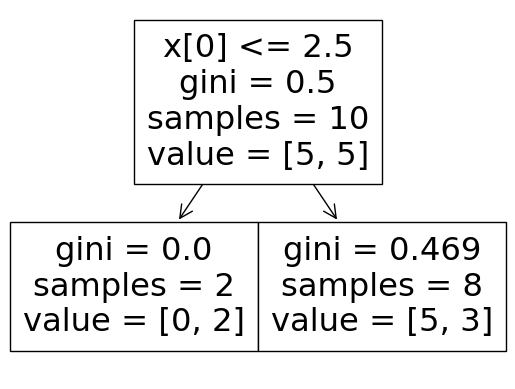

In [15]:
plot_tree(clf1)

In [18]:
df['y_pred'] = clf1.predict(x)

In [20]:
df

,x1,x2,label,sample_weight,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


e:\Boosting\env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

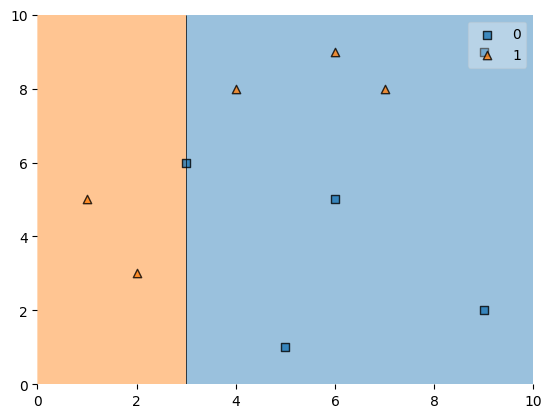

In [22]:
plot_decision_regions(np.array(x),np.array(y),clf=clf1,legend=True)

In [23]:
def calculate_model_performance(error):
     return 0.5*np.log((1-error)/(error))

In [30]:
alpha1 = calculate_model_performance(0.3)
alpha1

0.42364893019360184

In [29]:
df.head()

,x1,x2,label,sample_weight,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0


In [31]:
def update_row_weights(row,alpha=0.423):
     if row['label'] == row['y_pred']:
          return row['sample_weight']*np.exp(-alpha)
     else:
          return row['sample_weight']*np.exp(alpha)

In [33]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)

In [35]:
df

,x1,x2,label,sample_weight,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,0,0.065508
3,4,8,1,0.1,0,0.152653
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,0,0.152653
6,6,5,0,0.1,0,0.065508
7,7,8,1,0.1,0,0.152653
8,9,9,0,0.1,0,0.065508
9,9,2,0,0.1,0,0.065508


In [37]:
updated_weights_sum = df['updated_weights'].sum()

In [38]:
df['normalized_weights'] = df['updated_weights']/updated_weights_sum

In [39]:
df

,x1,x2,label,sample_weight,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,0,0.065508,0.071475
3,4,8,1,0.1,0,0.152653,0.166559
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,0,0.152653,0.166559
6,6,5,0,0.1,0,0.065508,0.071475
7,7,8,1,0.1,0,0.152653,0.166559
8,9,9,0,0.1,0,0.065508,0.071475
9,9,2,0,0.1,0,0.065508,0.071475


In [41]:
df['cumsum_upper'] = np.cumsum(df['normalized_weights'])
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weights']


df[['x1','x2', 'label','sample_weight', 'y_pred', 'updated_weights', 'normalized_weights', 'cumsum_lower','cumsum_upper']]

,x1,x2,label,sample_weight,y_pred,updated_weights,normalized_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.071475,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.071475,0.142950
2,3,6,0,0.1,0,0.065508,0.071475,0.142950,0.214425
3,4,8,1,0.1,0,0.152653,0.166559,0.214425,0.380983
4,5,1,0,0.1,0,0.065508,0.071475,0.380983,0.452458
5,6,9,1,0.1,0,0.152653,0.166559,0.452458,0.619017
6,6,5,0,0.1,0,0.065508,0.071475,0.619017,0.690492
7,7,8,1,0.1,0,0.152653,0.166559,0.690492,0.857050
8,9,9,0,0.1,0,0.065508,0.071475,0.857050,0.928525
9,9,2,0,0.1,0,0.065508,0.071475,0.928525,1.000000


In [47]:

indexes = []

for i in range(df.shape[0]):
     a=np.random.random()
     for index,row in df.iterrows():
          if row['cumsum_upper'] > a and a > row['cumsum_lower']:
               indexes.append(index)
               
print(indexes)
     

[7, 7, 8, 7, 5, 0, 3, 4, 5, 2]


In [64]:
df2 = df.iloc[indexes][['x1','x2','label']]

In [65]:
df2.head()

,x1,x2,label
7,7,8,1
7,7,8,1
8,9,9,0
7,7,8,1
5,6,9,1


In [66]:
p = df2.iloc[:,0:2]
q = df2.iloc[:,-1]

In [68]:
df2['sample_weight'] = 1/df2.shape[0]

In [69]:
df2

,x1,x2,label,sample_weight
7,7,8,1,0.1
7,7,8,1,0.1
8,9,9,0,0.1
7,7,8,1,0.1
5,6,9,1,0.1
0,1,5,1,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
2,3,6,0,0.1


In [70]:
clf2 = DecisionTreeClassifier(max_depth=1)

In [71]:
clf2.fit(p,q)

DecisionTreeClassifier(max_depth=1)

In [73]:
df2['y_pred2'] = clf2.predict(p)

In [74]:
df2

,x1,x2,label,sample_weight,y_pred2
7,7,8,1,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
7,7,8,1,0.1,1
5,6,9,1,0.1,1
0,1,5,1,0.1,0
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
2,3,6,0,0.1,0


In [75]:
alpha2 = calculate_model_performance(0.2)
alpha2

0.6931471805599453

In [78]:
def update_row_weights(row,alpha=0.69):
     if row['label'] == row['y_pred2']:
          return row['sample_weight']*np.exp(-alpha)
     else:
          return row['sample_weight']*np.exp(alpha)

In [79]:
df2['updated_weight'] = df2.apply(update_row_weights, axis=1)

In [80]:
df2

,x1,x2,label,sample_weight,y_pred2,updated_weight
7,7,8,1,0.1,1,0.050158
7,7,8,1,0.1,1,0.050158
8,9,9,0,0.1,1,0.199372
7,7,8,1,0.1,1,0.050158
5,6,9,1,0.1,1,0.050158
0,1,5,1,0.1,0,0.199372
3,4,8,1,0.1,1,0.050158
4,5,1,0,0.1,0,0.050158
5,6,9,1,0.1,1,0.050158
2,3,6,0,0.1,0,0.050158


In [81]:
df2['normalized_weight'] = df2['updated_weight']/df2['updated_weight'].sum()

In [86]:
df2

,x1,x2,label,sample_weight,y_pred2,updated_weight,normalized_weight,cumsum_upper,cumsum_lower
7,7,8,1,0.1,1,0.050158,0.062697,0.062697,0.000000
7,7,8,1,0.1,1,0.050158,0.062697,0.125393,0.062697
8,9,9,0,0.1,1,0.199372,0.249213,0.374607,0.125393
7,7,8,1,0.1,1,0.050158,0.062697,0.437303,0.374607
5,6,9,1,0.1,1,0.050158,0.062697,0.500000,0.437303
0,1,5,1,0.1,0,0.199372,0.249213,0.749213,0.500000
3,4,8,1,0.1,1,0.050158,0.062697,0.811910,0.749213
4,5,1,0,0.1,0,0.050158,0.062697,0.874607,0.811910
5,6,9,1,0.1,1,0.050158,0.062697,0.937303,0.874607
2,3,6,0,0.1,0,0.050158,0.062697,1.000000,0.937303


In [88]:
df2['cumsum_upper'] = np.cumsum(df2['normalized_weight'])
df2['cumsum_lower'] = df2['cumsum_upper'] - df2['normalized_weight']


df2[['x1','x2', 'label','sample_weight', 'y_pred2', 'updated_weight', 'normalized_weight', 'cumsum_lower','cumsum_upper']]

,x1,x2,label,sample_weight,y_pred2,updated_weight,normalized_weight,cumsum_lower,cumsum_upper
7,7,8,1,0.1,1,0.050158,0.062697,0.000000,0.062697
7,7,8,1,0.1,1,0.050158,0.062697,0.062697,0.125393
8,9,9,0,0.1,1,0.199372,0.249213,0.125393,0.374607
7,7,8,1,0.1,1,0.050158,0.062697,0.374607,0.437303
5,6,9,1,0.1,1,0.050158,0.062697,0.437303,0.500000
0,1,5,1,0.1,0,0.199372,0.249213,0.500000,0.749213
3,4,8,1,0.1,1,0.050158,0.062697,0.749213,0.811910
4,5,1,0,0.1,0,0.050158,0.062697,0.811910,0.874607
5,6,9,1,0.1,1,0.050158,0.062697,0.874607,0.937303
2,3,6,0,0.1,0,0.050158,0.062697,0.937303,1.000000


In [90]:
indexes2 = []

for i in range(df2.shape[0]):
     a=np.random.random()
     for index,row in df2.iterrows():
          if row['cumsum_upper'] > a and a > row['cumsum_lower']:
               indexes2.append(index)
               
print(indexes2)

[4, 3, 8, 8, 2, 7, 8, 8, 8, 7]


In [92]:
df3 = df2.iloc[indexes2][['x1','x2','label']]

In [93]:
df3

,x1,x2,label
5,6,9,1
7,7,8,1
5,6,9,1
5,6,9,1
8,9,9,0
4,5,1,0
5,6,9,1
5,6,9,1
5,6,9,1
4,5,1,0


# final prediction

In [ ]:
query = np.array([[5,1]])

clf1.predict(query)

e:\Boosting\env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [95]:
clf2.predict(query)

e:\Boosting\env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [97]:
f = alpha1*(-1) + alpha2*(-1)

In [99]:
final_prediction = np.sign(f)

In [100]:
query2 = np.array([[6,9]])

In [101]:
clf1.predict(query2)

e:\Boosting\env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [102]:
clf2.predict(query2)

e:\Boosting\env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [103]:
f2 = alpha1*(-1) + alpha2*(1)

In [105]:
final_prediction2 = np.sign(f2)